In [3]:
!pip3 install pandas_datareader
!pip3 install yfinance
!pip3 install fix_yahoo_finance

  Using cached https://files.pythonhosted.org/packages/22/f1/a02eea03628865c3d4c29849cda8c8a73f43358048aee47d79dfbfa6c6c3/pandas_datareader-0.9.0-py3-none-any.whl
    100% |████████████████████████████████| 71kB 861kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/b5/71/870c653fe041f16587c8a1a3eb840cf50312a387326fea7374f6948520b7/pandas-1.1.1-cp37-cp37m-macosx_10_9_x86_64.whl
    100% |████████████████████████████████| 143kB 2.3MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/5e/c4/6c4fe722df5343c33226f0b4e0bb042e4dc13483228b4718baf286f86d87/certifi-2020.6.20-py2.py3-none-any.whl
    100% |████████████████████████████████| 133kB 2.9MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/4f/a4/879454d49688e2fad93e59d7d4efda580b783c745fd2ec2a3adf87b0808d/pytz-2020.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-p

In [4]:
from pandas_datareader import data
import datetime
import yfinance as yf
yf.pdr_override()

In [8]:
start_date = '2010-01-01'
name = '034730.KS'
df = data.get_data_yahoo(name, start_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,45300.0,47600.0,44700.0,47250.0,42860.449219,416886
2010-01-05,48000.0,49800.0,47350.0,49050.0,44493.230469,814484
2010-01-06,49250.0,51300.0,48600.0,50000.0,45354.972656,715782


In [10]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-28,218500.0,230000.0,218000.0,224000.0,224000.0,446589
2020-08-31,224000.0,227500.0,212500.0,214000.0,214000.0,487729
2020-09-01,213500.0,215500.0,210500.0,214500.0,214500.0,200276
2020-09-02,214500.0,217500.0,213000.0,217500.0,217500.0,159873
2020-09-04,209500.0,212000.0,209000.0,212000.0,212000.0,281391


In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

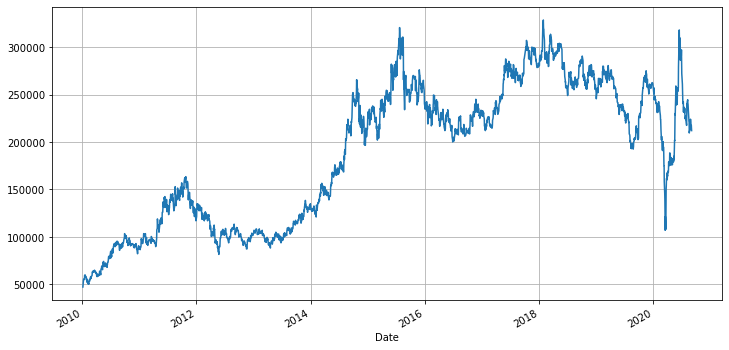

In [13]:
df['Close'].plot(figsize=(12, 6), grid=True)

In [25]:
df_trunc = df[:'2020-06-30']
df_trunc.head(3)
df_trunc.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-24,297500.0,302500.0,285500.0,286500.0,286500.0,3591128
2020-06-25,287000.0,293500.0,281000.0,286000.0,286000.0,921229
2020-06-26,291000.0,294500.0,284000.0,292000.0,292000.0,919125
2020-06-29,289500.0,297500.0,286000.0,293000.0,293000.0,921514
2020-06-30,297500.0,298500.0,286500.0,291000.0,291000.0,925711


In [26]:
new_df = pd.DataFrame({'ds':df_trunc.index, 'y':df_trunc['Close']})
new_df.reset_index(inplace=True)
del new_df['Date']
new_df.head(3)

,ds,y
0,2010-01-04,47250.0
1,2010-01-05,49050.0
2,2010-01-06,50000.0


In [27]:
from fbprophet import Prophet

In [28]:
m = Prophet()
m.fit(new_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=365*2)
future.tail(3)

,ds
3310,2022-06-28
3311,2022-06-29
3312,2022-06-30


In [30]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper']].tail(3)

,ds,yhat,yhat_lower,yhat_upper
3310,2022-06-28,142900.676900,48042.971010,244674.761447
3311,2022-06-29,142282.701522,46003.775225,242310.059280
3312,2022-06-30,142200.930634,47371.816300,242316.056771


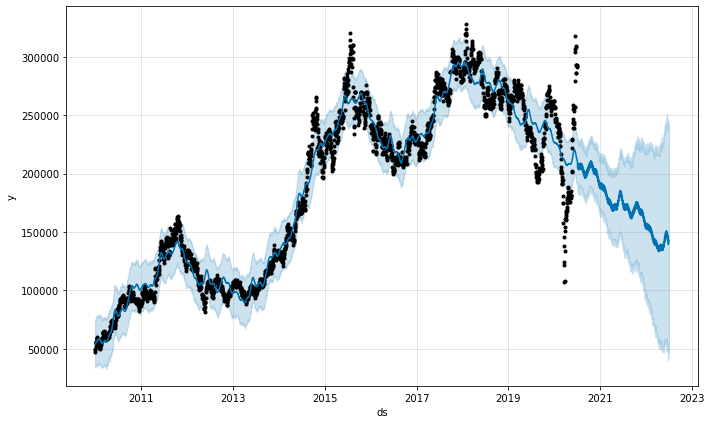

In [31]:
m.plot(forecast);

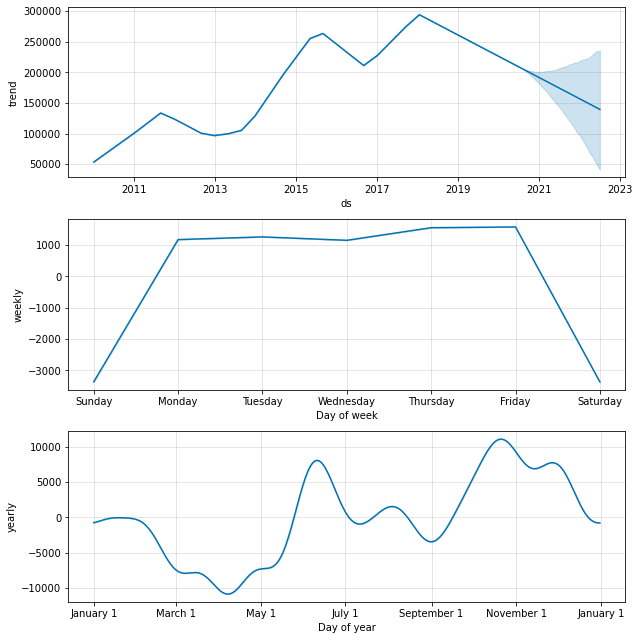

In [33]:
m.plot_components(forecast);

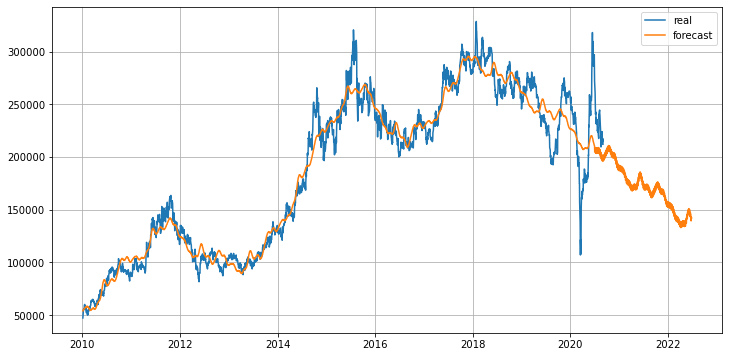

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3308,2022-06-26,139820.242742,40984.672044,236517.337386,42176.821413,235036.386106,-466.106423,-466.106423,-466.106423,-3364.661376,-3364.661376,-3364.661376,2898.554953,2898.554953,2898.554953,0.0,0.0,0.0,139354.136319
3309,2022-06-27,139725.198973,45580.939874,242856.206632,41876.136366,235177.479164,3620.675675,3620.675675,3620.675675,1176.522749,1176.522749,1176.522749,2444.152926,2444.152926,2444.152926,0.0,0.0,0.0,143345.874648
3310,2022-06-28,139630.155204,48042.971010,244674.761447,41575.451318,235398.597966,3270.521696,3270.521696,3270.521696,1262.648403,1262.648403,1262.648403,2007.873293,2007.873293,2007.873293,0.0,0.0,0.0,142900.676900
3311,2022-06-29,139535.111436,46003.775225,242310.059280,41294.254482,235619.716768,2747.590086,2747.590086,2747.590086,1153.872971,1153.872971,1153.872971,1593.717115,1593.717115,1593.717115,0.0,0.0,0.0,142282.701522
3312,2022-06-30,139440.067667,47371.816300,242316.056771,41053.977022,235840.835569,2760.862967,2760.862967,2760.862967,1555.730678,1555.730678,1555.730678,1205.132289,1205.132289,1205.132289,0.0,0.0,0.0,142200.930634


In [39]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,53413.091768,34090.507320,75507.943988,53413.091768,53413.091768,572.272821,572.272821,572.272821,1176.522749,1176.522749,1176.522749,-604.249927,-604.249927,-604.249927,0.0,0.0,0.0,53985.364589
1,2010-01-05,53542.505728,35961.478618,73910.914989,53542.505728,53542.505728,718.784064,718.784064,718.784064,1262.648403,1262.648403,1262.648403,-543.864339,-543.864339,-543.864339,0.0,0.0,0.0,54261.289791
2,2010-01-06,53671.919687,33819.771492,74973.560139,53671.919687,53671.919687,673.014240,673.014240,673.014240,1153.872971,1153.872971,1153.872971,-480.858731,-480.858731,-480.858731,0.0,0.0,0.0,54344.933927
3,2010-01-07,53801.333647,35815.473240,74549.306534,53801.333647,53801.333647,1138.113805,1138.113805,1138.113805,1555.730678,1555.730678,1555.730678,-417.616872,-417.616872,-417.616872,0.0,0.0,0.0,54939.447452
4,2010-01-08,53930.747607,35965.859629,74621.168990,53930.747607,53930.747607,1224.356706,1224.356706,1224.356706,1580.548050,1580.548050,1580.548050,-356.191344,-356.191344,-356.191344,0.0,0.0,0.0,55155.104312
5,2010-01-11,54318.989486,34900.517130,74582.976580,54318.989486,54318.989486,978.640909,978.640909,978.640909,1176.522749,1176.522749,1176.522749,-197.881839,-197.881839,-197.881839,0.0,0.0,0.0,55297.630395
6,2010-01-12,54448.403445,35489.356891,75519.244749,54448.403445,54448.403445,1105.711829,1105.711829,1105.711829,1262.648403,1262.648403,1262.648403,-156.936574,-156.936574,-156.936574,0.0,0.0,0.0,55554.115274
7,2010-01-13,54577.817405,35716.082497,76214.336482,54577.817405,54577.817405,1031.267719,1031.267719,1031.267719,1153.872971,1153.872971,1153.872971,-122.605252,-122.605252,-122.605252,0.0,0.0,0.0,55609.085124
8,2010-01-14,54707.231365,34818.048955,78483.609651,54707.231365,54707.231365,1460.890784,1460.890784,1460.890784,1555.730678,1555.730678,1555.730678,-94.839894,-94.839894,-94.839894,0.0,0.0,0.0,56168.122148
9,2010-01-15,54836.645324,35481.472129,76802.203978,54836.645324,54836.645324,1507.208130,1507.208130,1507.208130,1580.548050,1580.548050,1580.548050,-73.339920,-73.339920,-73.339920,0.0,0.0,0.0,56343.853454


In [41]:
# 9/1 ~ 9/4까지의 주식 가격 표시 
forecast[(forecast.ds >= '2020-09-01') & (forecast.ds <= '2020-09-04')]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2645,2020-09-01,202834.261320,180785.091377,220485.451206,201587.087016,203858.271917,-2170.925120,-2170.925120,-2170.925120,1262.648403,1262.648403,1262.648403,-3433.573523,-3433.573523,-3433.573523,0.0,0.0,0.0,200663.336200
2646,2020-09-02,202739.217551,179573.154500,221317.055471,201465.784023,203789.154866,-2241.136373,-2241.136373,-2241.136373,1153.872971,1153.872971,1153.872971,-3395.009344,-3395.009344,-3395.009344,0.0,0.0,0.0,200498.081178
2647,2020-09-03,202644.173783,179150.717573,219948.801286,201358.369504,203762.165673,-1766.168926,-1766.168926,-1766.168926,1555.730678,1555.730678,1555.730678,-3321.899604,-3321.899604,-3321.899604,0.0,0.0,0.0,200878.004856
2648,2020-09-04,202549.130014,181392.078515,220819.930506,201241.267244,203720.585126,-1634.446513,-1634.446513,-1634.446513,1580.548050,1580.548050,1580.548050,-3214.994562,-3214.994562,-3214.994562,0.0,0.0,0.0,200914.683501
